## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 53.1ms	remaining: 53.1s
1:	learn: 0.9301086	total: 60.9ms	remaining: 30.4s
2:	learn: 0.9005637	total: 64.6ms	remaining: 21.5s
3:	learn: 0.8720983	total: 67.8ms	remaining: 16.9s
4:	learn: 0.8467410	total: 70.6ms	remaining: 14.1s
5:	learn: 0.8226672	total: 73.4ms	remaining: 12.2s
6:	learn: 0.7994702	total: 76.2ms	remaining: 10.8s
7:	learn: 0.7784272	total: 79ms	remaining: 9.79s
8:	learn: 0.7602192	total: 81.8ms	remaining: 9.01s
9:	learn: 0.7412421	total: 84.7ms	remaining: 8.38s
10:	learn: 0.7247930	total: 88.2ms	remaining: 7.93s
11:	learn: 0.7089951	total: 91.2ms	remaining: 7.51s
12:	learn: 0.6951345	total: 94.1ms	remaining: 7.14s
13:	learn: 0.6809276	total: 97.4ms	remaining: 6.86s
14:	learn: 0.6692630	total: 100ms	remaining: 6.58s
15:	learn: 0.6588323	total: 103ms	remaining: 6.33s
16:	learn: 0.6472700	total: 106ms	remaining: 6.11s
17:	learn: 0.6379982	total: 108ms	remaining: 5.91s
18:	learn: 0.6294674	total: 111ms	remaining: 5.74s

45:	learn: 0.5069096	total: 188ms	remaining: 3.9s
46:	learn: 0.5051685	total: 191ms	remaining: 3.86s
47:	learn: 0.5033968	total: 194ms	remaining: 3.84s
48:	learn: 0.5012433	total: 197ms	remaining: 3.81s
49:	learn: 0.4986132	total: 200ms	remaining: 3.79s
50:	learn: 0.4968022	total: 202ms	remaining: 3.77s
51:	learn: 0.4951632	total: 206ms	remaining: 3.75s
52:	learn: 0.4928924	total: 209ms	remaining: 3.74s
53:	learn: 0.4917272	total: 212ms	remaining: 3.72s
54:	learn: 0.4895079	total: 215ms	remaining: 3.69s
55:	learn: 0.4881884	total: 218ms	remaining: 3.68s
56:	learn: 0.4861566	total: 221ms	remaining: 3.66s
57:	learn: 0.4850201	total: 224ms	remaining: 3.64s
58:	learn: 0.4840055	total: 227ms	remaining: 3.62s
59:	learn: 0.4824455	total: 230ms	remaining: 3.61s
60:	learn: 0.4809744	total: 233ms	remaining: 3.59s
61:	learn: 0.4801376	total: 236ms	remaining: 3.58s
62:	learn: 0.4792422	total: 239ms	remaining: 3.56s
63:	learn: 0.4780719	total: 242ms	remaining: 3.54s
64:	learn: 0.4771984	total: 245m

110:	learn: 0.4431075	total: 378ms	remaining: 3.03s
111:	learn: 0.4425498	total: 381ms	remaining: 3.02s
112:	learn: 0.4419106	total: 384ms	remaining: 3.01s
113:	learn: 0.4414425	total: 386ms	remaining: 3s
114:	learn: 0.4407446	total: 389ms	remaining: 2.99s
115:	learn: 0.4402011	total: 392ms	remaining: 2.99s
116:	learn: 0.4398559	total: 395ms	remaining: 2.98s
117:	learn: 0.4392990	total: 397ms	remaining: 2.97s
118:	learn: 0.4389153	total: 400ms	remaining: 2.96s
119:	learn: 0.4383331	total: 403ms	remaining: 2.95s
120:	learn: 0.4378136	total: 406ms	remaining: 2.95s
121:	learn: 0.4375553	total: 409ms	remaining: 2.94s
122:	learn: 0.4369995	total: 411ms	remaining: 2.93s
123:	learn: 0.4366325	total: 414ms	remaining: 2.92s
124:	learn: 0.4362823	total: 417ms	remaining: 2.92s
125:	learn: 0.4359535	total: 420ms	remaining: 2.91s
126:	learn: 0.4353142	total: 424ms	remaining: 2.92s
127:	learn: 0.4349006	total: 427ms	remaining: 2.91s
128:	learn: 0.4345032	total: 430ms	remaining: 2.9s
129:	learn: 0.43

176:	learn: 0.4136755	total: 569ms	remaining: 2.64s
177:	learn: 0.4133860	total: 571ms	remaining: 2.64s
178:	learn: 0.4129780	total: 574ms	remaining: 2.63s
179:	learn: 0.4122907	total: 577ms	remaining: 2.63s
180:	learn: 0.4119188	total: 580ms	remaining: 2.62s
181:	learn: 0.4115412	total: 582ms	remaining: 2.62s
182:	learn: 0.4112620	total: 585ms	remaining: 2.61s
183:	learn: 0.4107734	total: 588ms	remaining: 2.61s
184:	learn: 0.4104881	total: 591ms	remaining: 2.6s
185:	learn: 0.4100009	total: 593ms	remaining: 2.6s
186:	learn: 0.4096453	total: 596ms	remaining: 2.59s
187:	learn: 0.4093395	total: 600ms	remaining: 2.59s
188:	learn: 0.4090020	total: 602ms	remaining: 2.58s
189:	learn: 0.4085981	total: 605ms	remaining: 2.58s
190:	learn: 0.4082397	total: 608ms	remaining: 2.57s
191:	learn: 0.4079846	total: 610ms	remaining: 2.57s
192:	learn: 0.4076364	total: 613ms	remaining: 2.56s
193:	learn: 0.4069970	total: 617ms	remaining: 2.56s
194:	learn: 0.4066685	total: 620ms	remaining: 2.56s
195:	learn: 0.

235:	learn: 0.3944181	total: 762ms	remaining: 2.47s
236:	learn: 0.3941497	total: 765ms	remaining: 2.46s
237:	learn: 0.3939819	total: 768ms	remaining: 2.46s
238:	learn: 0.3938322	total: 770ms	remaining: 2.45s
239:	learn: 0.3935463	total: 773ms	remaining: 2.45s
240:	learn: 0.3933166	total: 776ms	remaining: 2.44s
241:	learn: 0.3930992	total: 779ms	remaining: 2.44s
242:	learn: 0.3928898	total: 782ms	remaining: 2.44s
243:	learn: 0.3926199	total: 784ms	remaining: 2.43s
244:	learn: 0.3923955	total: 787ms	remaining: 2.43s
245:	learn: 0.3922312	total: 790ms	remaining: 2.42s
246:	learn: 0.3919499	total: 793ms	remaining: 2.42s
247:	learn: 0.3917420	total: 796ms	remaining: 2.41s
248:	learn: 0.3915186	total: 799ms	remaining: 2.41s
249:	learn: 0.3912759	total: 801ms	remaining: 2.4s
250:	learn: 0.3908375	total: 805ms	remaining: 2.4s
251:	learn: 0.3904815	total: 808ms	remaining: 2.4s
252:	learn: 0.3902127	total: 811ms	remaining: 2.39s
253:	learn: 0.3900274	total: 813ms	remaining: 2.39s
254:	learn: 0.3

300:	learn: 0.3793733	total: 953ms	remaining: 2.21s
301:	learn: 0.3791607	total: 956ms	remaining: 2.21s
302:	learn: 0.3789297	total: 959ms	remaining: 2.21s
303:	learn: 0.3787482	total: 962ms	remaining: 2.2s
304:	learn: 0.3786528	total: 965ms	remaining: 2.2s
305:	learn: 0.3784406	total: 968ms	remaining: 2.2s
306:	learn: 0.3782934	total: 972ms	remaining: 2.19s
307:	learn: 0.3781631	total: 975ms	remaining: 2.19s
308:	learn: 0.3779278	total: 978ms	remaining: 2.19s
309:	learn: 0.3777358	total: 980ms	remaining: 2.18s
310:	learn: 0.3775809	total: 983ms	remaining: 2.18s
311:	learn: 0.3774323	total: 987ms	remaining: 2.17s
312:	learn: 0.3772732	total: 990ms	remaining: 2.17s
313:	learn: 0.3771184	total: 993ms	remaining: 2.17s
314:	learn: 0.3769370	total: 998ms	remaining: 2.17s
315:	learn: 0.3766643	total: 1s	remaining: 2.17s
316:	learn: 0.3764891	total: 1s	remaining: 2.16s
317:	learn: 0.3762751	total: 1s	remaining: 2.16s
318:	learn: 0.3761284	total: 1.01s	remaining: 2.15s
319:	learn: 0.3760168	to

366:	learn: 0.3676022	total: 1.15s	remaining: 1.98s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.97s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.97s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.97s
370:	learn: 0.3670563	total: 1.16s	remaining: 1.96s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.96s
372:	learn: 0.3668381	total: 1.16s	remaining: 1.95s
373:	learn: 0.3666564	total: 1.17s	remaining: 1.95s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.95s
375:	learn: 0.3661576	total: 1.17s	remaining: 1.95s
376:	learn: 0.3659742	total: 1.17s	remaining: 1.94s
377:	learn: 0.3658330	total: 1.18s	remaining: 1.94s
378:	learn: 0.3656680	total: 1.18s	remaining: 1.93s
379:	learn: 0.3654606	total: 1.18s	remaining: 1.93s
380:	learn: 0.3651842	total: 1.19s	remaining: 1.93s
381:	learn: 0.3650538	total: 1.19s	remaining: 1.92s
382:	learn: 0.3649246	total: 1.19s	remaining: 1.92s
383:	learn: 0.3647854	total: 1.2s	remaining: 1.92s
384:	learn: 0.3646814	total: 1.2s	remaining: 1.91s
385:	learn: 0.

431:	learn: 0.3574686	total: 1.34s	remaining: 1.76s
432:	learn: 0.3572923	total: 1.34s	remaining: 1.75s
433:	learn: 0.3571859	total: 1.34s	remaining: 1.75s
434:	learn: 0.3570185	total: 1.34s	remaining: 1.75s
435:	learn: 0.3568416	total: 1.35s	remaining: 1.74s
436:	learn: 0.3566846	total: 1.35s	remaining: 1.74s
437:	learn: 0.3565875	total: 1.35s	remaining: 1.74s
438:	learn: 0.3564768	total: 1.36s	remaining: 1.73s
439:	learn: 0.3563559	total: 1.36s	remaining: 1.73s
440:	learn: 0.3561557	total: 1.36s	remaining: 1.73s
441:	learn: 0.3559793	total: 1.36s	remaining: 1.72s
442:	learn: 0.3558695	total: 1.37s	remaining: 1.72s
443:	learn: 0.3557039	total: 1.37s	remaining: 1.72s
444:	learn: 0.3555934	total: 1.37s	remaining: 1.71s
445:	learn: 0.3553700	total: 1.38s	remaining: 1.71s
446:	learn: 0.3553048	total: 1.38s	remaining: 1.71s
447:	learn: 0.3550824	total: 1.38s	remaining: 1.7s
448:	learn: 0.3549146	total: 1.39s	remaining: 1.7s
449:	learn: 0.3548607	total: 1.39s	remaining: 1.7s
450:	learn: 0.3

498:	learn: 0.3480855	total: 1.53s	remaining: 1.53s
499:	learn: 0.3478655	total: 1.53s	remaining: 1.53s
500:	learn: 0.3477966	total: 1.53s	remaining: 1.53s
501:	learn: 0.3476142	total: 1.54s	remaining: 1.52s
502:	learn: 0.3474667	total: 1.54s	remaining: 1.52s
503:	learn: 0.3473844	total: 1.54s	remaining: 1.52s
504:	learn: 0.3471852	total: 1.54s	remaining: 1.51s
505:	learn: 0.3471124	total: 1.55s	remaining: 1.51s
506:	learn: 0.3469987	total: 1.55s	remaining: 1.51s
507:	learn: 0.3469000	total: 1.55s	remaining: 1.5s
508:	learn: 0.3467621	total: 1.56s	remaining: 1.5s
509:	learn: 0.3466653	total: 1.56s	remaining: 1.5s
510:	learn: 0.3465795	total: 1.56s	remaining: 1.49s
511:	learn: 0.3464899	total: 1.56s	remaining: 1.49s
512:	learn: 0.3463711	total: 1.57s	remaining: 1.49s
513:	learn: 0.3462483	total: 1.57s	remaining: 1.49s
514:	learn: 0.3460733	total: 1.57s	remaining: 1.48s
515:	learn: 0.3459427	total: 1.58s	remaining: 1.48s
516:	learn: 0.3458363	total: 1.58s	remaining: 1.48s
517:	learn: 0.3

562:	learn: 0.3402264	total: 1.72s	remaining: 1.33s
563:	learn: 0.3400466	total: 1.72s	remaining: 1.33s
564:	learn: 0.3399235	total: 1.73s	remaining: 1.33s
565:	learn: 0.3398064	total: 1.73s	remaining: 1.33s
566:	learn: 0.3396466	total: 1.73s	remaining: 1.32s
567:	learn: 0.3395531	total: 1.74s	remaining: 1.32s
568:	learn: 0.3394093	total: 1.74s	remaining: 1.32s
569:	learn: 0.3393241	total: 1.74s	remaining: 1.31s
570:	learn: 0.3392368	total: 1.75s	remaining: 1.31s
571:	learn: 0.3391373	total: 1.75s	remaining: 1.31s
572:	learn: 0.3390261	total: 1.75s	remaining: 1.3s
573:	learn: 0.3389126	total: 1.75s	remaining: 1.3s
574:	learn: 0.3388268	total: 1.76s	remaining: 1.3s
575:	learn: 0.3387474	total: 1.76s	remaining: 1.3s
576:	learn: 0.3386361	total: 1.76s	remaining: 1.29s
577:	learn: 0.3385706	total: 1.77s	remaining: 1.29s
578:	learn: 0.3384814	total: 1.77s	remaining: 1.29s
579:	learn: 0.3383559	total: 1.77s	remaining: 1.28s
580:	learn: 0.3382469	total: 1.78s	remaining: 1.28s
581:	learn: 0.33

622:	learn: 0.3341456	total: 1.91s	remaining: 1.16s
623:	learn: 0.3340640	total: 1.91s	remaining: 1.15s
624:	learn: 0.3339122	total: 1.92s	remaining: 1.15s
625:	learn: 0.3337503	total: 1.92s	remaining: 1.15s
626:	learn: 0.3336593	total: 1.92s	remaining: 1.14s
627:	learn: 0.3335713	total: 1.93s	remaining: 1.14s
628:	learn: 0.3333915	total: 1.93s	remaining: 1.14s
629:	learn: 0.3333158	total: 1.93s	remaining: 1.13s
630:	learn: 0.3332088	total: 1.93s	remaining: 1.13s
631:	learn: 0.3331129	total: 1.94s	remaining: 1.13s
632:	learn: 0.3330288	total: 1.94s	remaining: 1.12s
633:	learn: 0.3328844	total: 1.94s	remaining: 1.12s
634:	learn: 0.3328544	total: 1.95s	remaining: 1.12s
635:	learn: 0.3327021	total: 1.95s	remaining: 1.11s
636:	learn: 0.3326462	total: 1.95s	remaining: 1.11s
637:	learn: 0.3325758	total: 1.95s	remaining: 1.11s
638:	learn: 0.3324324	total: 1.96s	remaining: 1.1s
639:	learn: 0.3323174	total: 1.96s	remaining: 1.1s
640:	learn: 0.3322206	total: 1.96s	remaining: 1.1s
641:	learn: 0.3

688:	learn: 0.3275537	total: 2.1s	remaining: 949ms
689:	learn: 0.3274808	total: 2.1s	remaining: 946ms
690:	learn: 0.3273839	total: 2.11s	remaining: 943ms
691:	learn: 0.3272773	total: 2.11s	remaining: 940ms
692:	learn: 0.3272088	total: 2.12s	remaining: 937ms
693:	learn: 0.3271216	total: 2.12s	remaining: 935ms
694:	learn: 0.3270566	total: 2.12s	remaining: 932ms
695:	learn: 0.3269516	total: 2.13s	remaining: 929ms
696:	learn: 0.3267980	total: 2.13s	remaining: 926ms
697:	learn: 0.3266887	total: 2.13s	remaining: 923ms
698:	learn: 0.3265888	total: 2.13s	remaining: 919ms
699:	learn: 0.3265229	total: 2.14s	remaining: 916ms
700:	learn: 0.3264350	total: 2.14s	remaining: 913ms
701:	learn: 0.3263223	total: 2.14s	remaining: 910ms
702:	learn: 0.3262539	total: 2.15s	remaining: 907ms
703:	learn: 0.3261258	total: 2.15s	remaining: 903ms
704:	learn: 0.3260520	total: 2.15s	remaining: 900ms
705:	learn: 0.3259475	total: 2.15s	remaining: 897ms
706:	learn: 0.3258911	total: 2.16s	remaining: 894ms
707:	learn: 0.

751:	learn: 0.3219897	total: 2.29s	remaining: 757ms
752:	learn: 0.3218990	total: 2.3s	remaining: 754ms
753:	learn: 0.3218179	total: 2.3s	remaining: 751ms
754:	learn: 0.3217323	total: 2.3s	remaining: 748ms
755:	learn: 0.3216617	total: 2.31s	remaining: 745ms
756:	learn: 0.3216090	total: 2.31s	remaining: 742ms
757:	learn: 0.3215306	total: 2.31s	remaining: 739ms
758:	learn: 0.3214274	total: 2.32s	remaining: 736ms
759:	learn: 0.3212014	total: 2.32s	remaining: 733ms
760:	learn: 0.3211190	total: 2.32s	remaining: 730ms
761:	learn: 0.3210312	total: 2.33s	remaining: 726ms
762:	learn: 0.3209495	total: 2.33s	remaining: 724ms
763:	learn: 0.3208564	total: 2.33s	remaining: 721ms
764:	learn: 0.3207911	total: 2.33s	remaining: 717ms
765:	learn: 0.3206643	total: 2.34s	remaining: 714ms
766:	learn: 0.3205891	total: 2.34s	remaining: 711ms
767:	learn: 0.3204765	total: 2.34s	remaining: 708ms
768:	learn: 0.3203840	total: 2.35s	remaining: 705ms
769:	learn: 0.3203086	total: 2.35s	remaining: 702ms
770:	learn: 0.3

813:	learn: 0.3165391	total: 2.49s	remaining: 568ms
814:	learn: 0.3164726	total: 2.49s	remaining: 565ms
815:	learn: 0.3164087	total: 2.49s	remaining: 562ms
816:	learn: 0.3163590	total: 2.5s	remaining: 559ms
817:	learn: 0.3162644	total: 2.5s	remaining: 556ms
818:	learn: 0.3161739	total: 2.5s	remaining: 553ms
819:	learn: 0.3160986	total: 2.5s	remaining: 550ms
820:	learn: 0.3159951	total: 2.51s	remaining: 547ms
821:	learn: 0.3159403	total: 2.51s	remaining: 544ms
822:	learn: 0.3158160	total: 2.52s	remaining: 543ms
823:	learn: 0.3157523	total: 2.53s	remaining: 540ms
824:	learn: 0.3156673	total: 2.53s	remaining: 537ms
825:	learn: 0.3156288	total: 2.53s	remaining: 533ms
826:	learn: 0.3155257	total: 2.54s	remaining: 530ms
827:	learn: 0.3154546	total: 2.54s	remaining: 527ms
828:	learn: 0.3153664	total: 2.54s	remaining: 524ms
829:	learn: 0.3152896	total: 2.54s	remaining: 521ms
830:	learn: 0.3152050	total: 2.55s	remaining: 518ms
831:	learn: 0.3151385	total: 2.55s	remaining: 515ms
832:	learn: 0.31

877:	learn: 0.3116088	total: 2.68s	remaining: 372ms
878:	learn: 0.3115190	total: 2.68s	remaining: 369ms
879:	learn: 0.3114687	total: 2.69s	remaining: 366ms
880:	learn: 0.3113934	total: 2.69s	remaining: 363ms
881:	learn: 0.3113378	total: 2.69s	remaining: 360ms
882:	learn: 0.3112367	total: 2.69s	remaining: 357ms
883:	learn: 0.3111915	total: 2.7s	remaining: 354ms
884:	learn: 0.3111075	total: 2.7s	remaining: 351ms
885:	learn: 0.3110486	total: 2.7s	remaining: 348ms
886:	learn: 0.3109334	total: 2.7s	remaining: 344ms
887:	learn: 0.3108347	total: 2.71s	remaining: 341ms
888:	learn: 0.3107647	total: 2.71s	remaining: 338ms
889:	learn: 0.3107302	total: 2.71s	remaining: 335ms
890:	learn: 0.3106509	total: 2.71s	remaining: 332ms
891:	learn: 0.3106139	total: 2.72s	remaining: 329ms
892:	learn: 0.3105421	total: 2.72s	remaining: 326ms
893:	learn: 0.3104659	total: 2.72s	remaining: 323ms
894:	learn: 0.3104028	total: 2.73s	remaining: 320ms
895:	learn: 0.3103186	total: 2.73s	remaining: 317ms
896:	learn: 0.31

941:	learn: 0.3070506	total: 2.87s	remaining: 177ms
942:	learn: 0.3070046	total: 2.88s	remaining: 174ms
943:	learn: 0.3069525	total: 2.88s	remaining: 171ms
944:	learn: 0.3068968	total: 2.88s	remaining: 168ms
945:	learn: 0.3068564	total: 2.88s	remaining: 165ms
946:	learn: 0.3067279	total: 2.89s	remaining: 162ms
947:	learn: 0.3066517	total: 2.89s	remaining: 159ms
948:	learn: 0.3066014	total: 2.89s	remaining: 156ms
949:	learn: 0.3065250	total: 2.9s	remaining: 152ms
950:	learn: 0.3064465	total: 2.9s	remaining: 149ms
951:	learn: 0.3063837	total: 2.9s	remaining: 146ms
952:	learn: 0.3063292	total: 2.9s	remaining: 143ms
953:	learn: 0.3062107	total: 2.91s	remaining: 140ms
954:	learn: 0.3061348	total: 2.91s	remaining: 137ms
955:	learn: 0.3060576	total: 2.92s	remaining: 134ms
956:	learn: 0.3059772	total: 2.92s	remaining: 131ms
957:	learn: 0.3058989	total: 2.92s	remaining: 128ms
958:	learn: 0.3057985	total: 2.92s	remaining: 125ms
959:	learn: 0.3056692	total: 2.93s	remaining: 122ms
960:	learn: 0.30

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5149114494015816


#### Sanity Checks 

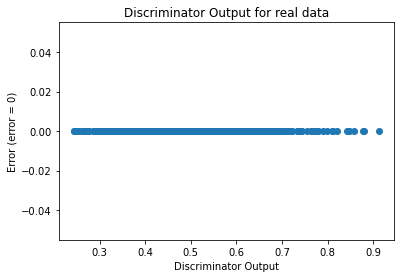

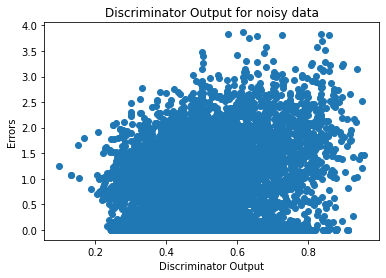

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)